In [1]:
## last edited: 5/27/22
## Status: Fixed path names to match new directory structure. 
##         Sucessfully plotting TDR wind speeds... 
##         a weird negative was added to the inbound velocities to get things looking right :(
import numpy as np
import os
import matplotlib.pyplot as plt
import xarray as xr
import datetime 
import warnings

os.chdir(  "/Users/etmu9498/research/code/scripts")
import make_plots

In [2]:
# view datasets

# paths to data
crl_path = "/Users/etmu9498/research/data/CRL_data/2021"
tdr_path = "/Users/etmu9498/research/data/tdr/sam/nc-files"

# load data to these variables
tdr_list = make_plots.load_tdr(tdr_path)
crl_list = make_plots.load_crl(crl_path)


tdr data files:
0) 210926H1_2237_vert_inbound.nc
1) 210926H1_2237_vert_outbound.nc
2) 210926H1_2350_vert_inbound.nc
3) 210926H1_2350_vert_outbound.nc
4) 210926H1_2457_vert_inbound.nc
5) 210926H1_2457_vert_outbound.nc
6) 210927H1_2205_vert_inbound.nc
7) 210927H1_2205_vert_outbound.nc
8) 210927H1_2320_vert_inbound.nc
9) 210927H1_2320_vert_outbound.nc
10) 210927H1_2433_vert_inbound.nc
11) 210927H1_2433_vert_outbound.nc
12) 210929H2_2137_vert_inbound.nc
13) 210929H2_2137_vert_outbound.nc
14) 210929H2_2249_vert_inbound.nc
15) 210929H2_2249_vert_outbound.nc
16) 210929H2_2402_vert_inbound.nc
17) 210929H2_2402_vert_outbound.nc

crl data files:
0) P3_20210811H1_200000-224759.cdf
1) P3_20210812H1_095513-125927.cdf
2) P3_20210812H2_212248-235510.cdf
3) P3_20210813H1_091801-113558.cdf
4) P3_20210816H1_085245-123459.cdf
5) P3_20210816H1_090000-102359.cdf
6) P3_20210817H1_094204-132058.cdf
7) P3_20210818H1_211425-244159.cdf
8) P3_20210819H1_213003-244159.cdf
9) P3_20210820H1_212402-245958.cdf
10) P3

In [3]:
# testing data things

os.chdir( tdr_path)
inbound_data = tdr_list[0]
in_data = xr.open_dataset( inbound_data)
in_data

<xarray.Dataset>
Dimensions:          (time: 1, height: 121, heading: 1, radius: 167)
Coordinates:
  * time             (time) float32 8.144e+04
  * height           (height) float32 0.0 0.15 0.3 0.45 ... 17.7 17.85 18.0
  * heading          (heading) float32 15.0
  * radius           (radius) float32 1.5 3.0 4.5 6.0 ... 247.5 249.0 250.5
Data variables: (12/15)
    azimuth          (radius) float32 ...
    altitude         (radius) float32 ...
    latitude         (radius) float32 ...
    longitude        (radius) float32 ...
    seconds          (radius) float32 ...
    u air            (radius) float32 ...
    ...               ...
    ws air           (radius) float32 ...
    Radial_wind      (radius, heading, height, time) float32 ...
    Tangential_Wind  (radius, heading, height, time) float32 ...
    Vertical_wind    (radius, heading, height, time) float32 ...
    Wind_Speed       (radius, heading, height, time) float32 ...
    REFLECTIVITY     (radius, heading, height, time) float32 ...
Attributes: (12/38)
    KEYWORD:                                                WIND
    FLTNAME:                                                210926H1
    STMNAME:                                                SAM
    RADAR:                                                  TAIL
    EXPERIMENT:                                             SAM
    CREATIME:                                               unknown
    ...                                                     ...
    BIEL:                                                   -999.0
    AZBIEL:                                                 -999.0
    STIME2:                                                 81439.0
    ETIME1:                                                 81439.0
    EXTRA6:                                                 -999.0
    EXTRA7:                                                 -999.0

(-52.0, -49.0)

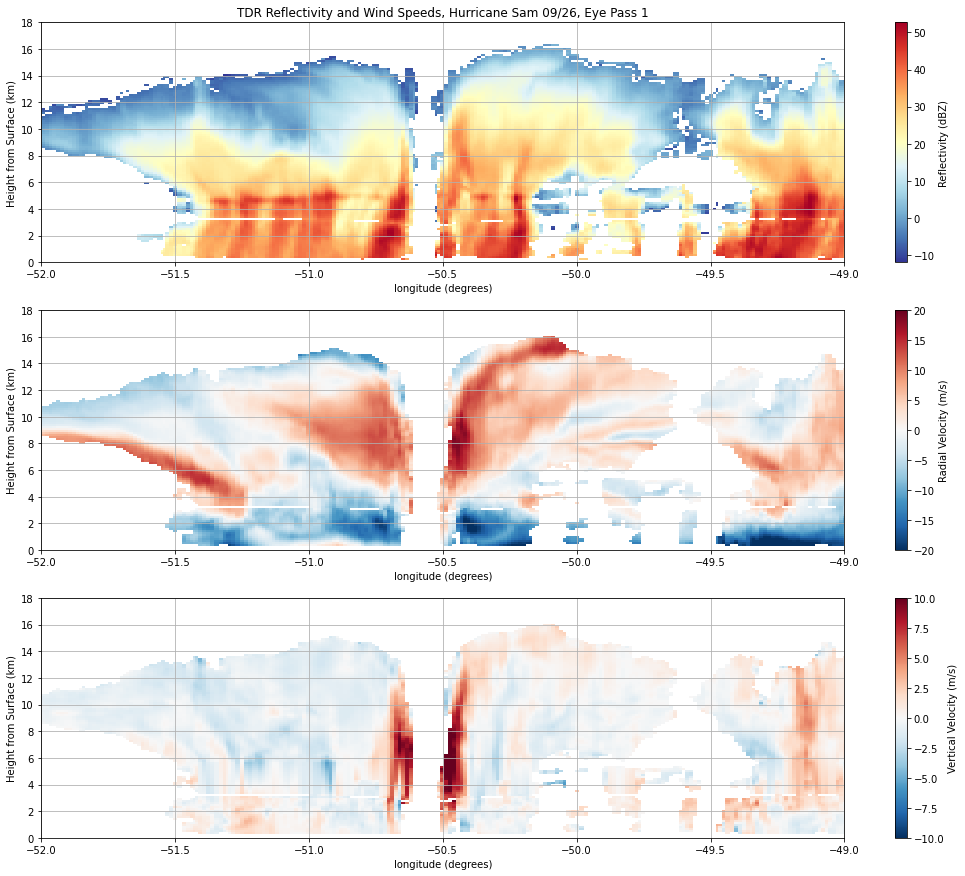

In [4]:
# load data, sam 9/26/21 pass 1

os.chdir( tdr_path)
inbound_data = tdr_list[0]
outbound_data = tdr_list[1]
os.chdir( crl_path)
crl_data = crl_list[16]

plt.figure(figsize=(18,15))
plt.subplot(311)
plt.title( "TDR Reflectivity and Wind Speeds, Hurricane Sam 09/26, Eye Pass 1")
make_plots.plot_tdr( tdr_path, inbound_data, outbound_data, 'lon')
plt.xlim([-52, -49])

plt.subplot(312)
make_plots.plot_tdr_radial_vel( tdr_path, inbound_data, outbound_data, 'lon')
plt.xlim([-52, -49])

plt.subplot(313)
make_plots.plot_tdr_vertical_vel( tdr_path, inbound_data, outbound_data, 'lon')
plt.xlim([-52, -49])